#### *SOURCE: CLARUSWAY   /   INSTRUCTOR: JasonTimberlake (Statistics)*

***

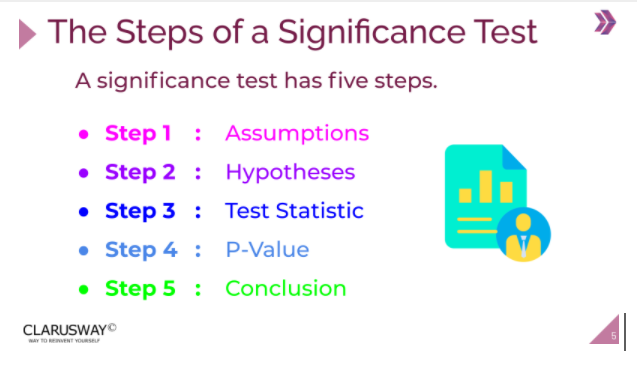

***

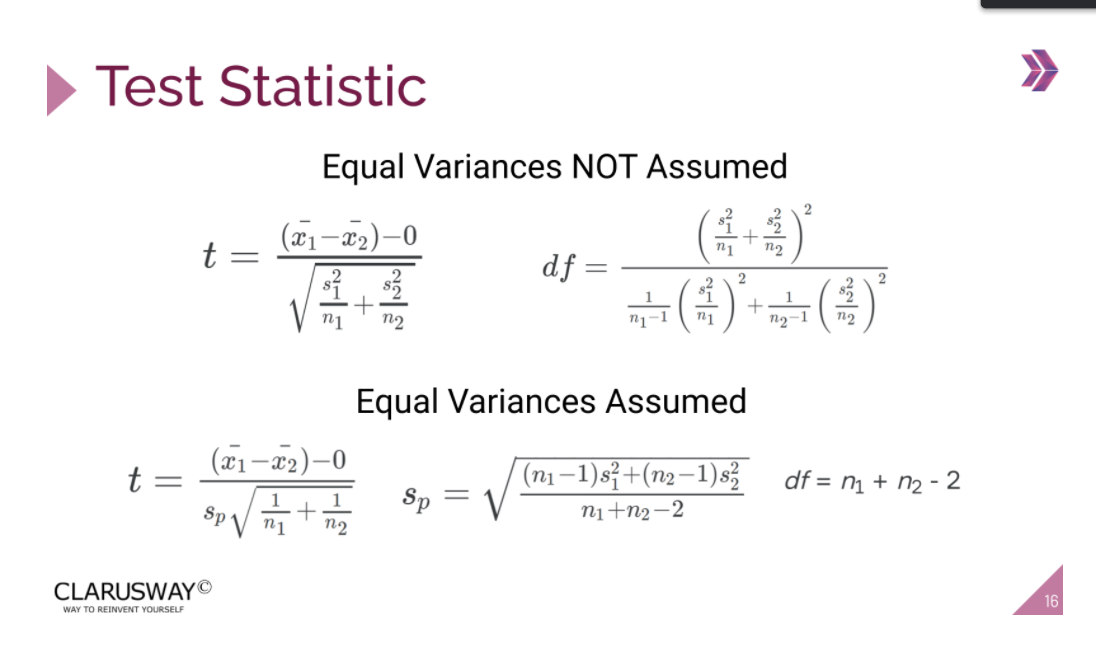

***

In [1]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats

import warnings;
warnings.filterwarnings('ignore')

***

<div class="alert alert-block alert-danger">
    
<b>Independent Samples T Test *(Two-Tailed)*</b>
    
</div>

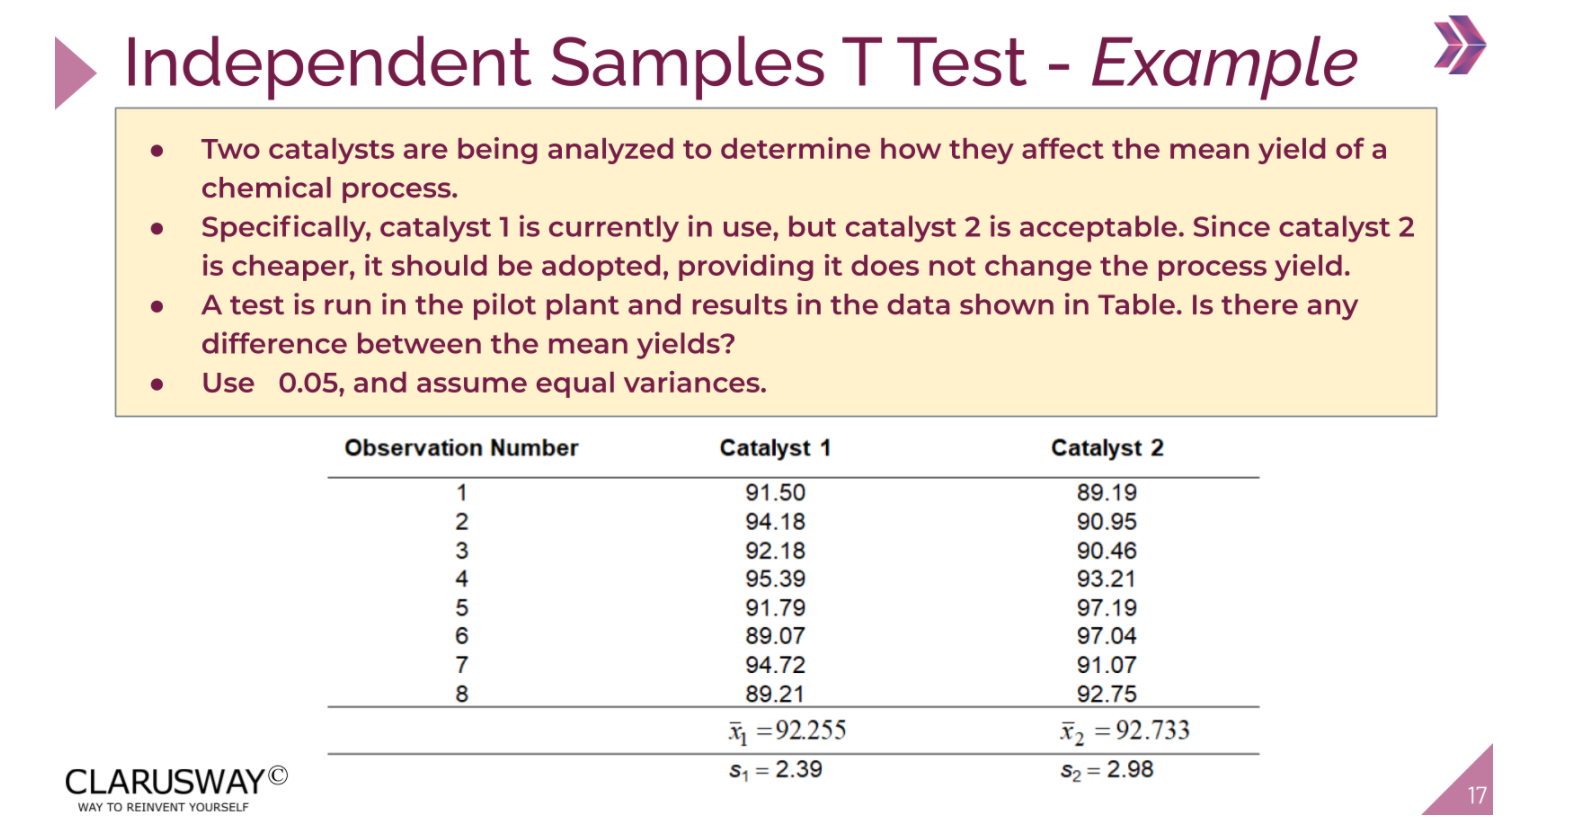

In [2]:
x = [91.50, 94.18, 92.18, 95.39, 91.79, 89.07, 94.72, 89.21]
y = [89.19, 90.95, 90.46, 93.21, 97.19, 97.04, 91.07, 92.75]

df = pd.DataFrame({"Catalyst1":x, "Catalyst2":y})
df

Catalyst1  Catalyst2
0      91.50      89.19
1      94.18      90.95
2      92.18      90.46
3      95.39      93.21
4      91.79      97.19
5      89.07      97.04
6      94.72      91.07
7      89.21      92.75

In [3]:
#Perform Levene test for equal variances

#H0: The population variances are equal
#H1: There is a difference between the variances in the population

#The small p-value suggests that the populations do not have equal variances.

leveneTest = stats.levene(df.Catalyst1, df.Catalyst2)
leveneTest

LeveneResult(statistic=0.3058072534327572, pvalue=0.5889864287280084)

In [4]:
leveneTest.pvalue < 0.05

False

In [ ]:
# Equal Variances Assumed

In [ ]:
# INDEPENDENT SAMPLES T-TEST ASSUMPTIONS
# The three basic assumptions of a test about difference between means are as follows:

- A quantitative response variable for two groups
- Independent random samples
- Approximately normal population distribution for each group

In [ ]:
# HYPOTHESIS

- H0: mu1 = mu2
- H1: mu1 != mu2

In [5]:
# THE POOLED ESTIMATE OF STANDARD DEVIATION

x1 = df.Catalyst1.mean() 
x2 = df.Catalyst2.mean()

s1 = df.Catalyst1.std()
s2 = df.Catalyst2.std()

n1 = n2 = 8

dof = n1+n2-2

In [6]:
Sp = ((((n1-1) * (s1**2)) + ((n2-1) * (s2**2))) / dof) ** 0.5
Sp

2.7008616350025383

In [7]:
# TEST STATISTIC

t = (x1 - x2) / (Sp*((1/n1 + 1/n2)**0.5))
t

-0.35359086434617987

In [8]:
# P-VALUE

pValue = 2 * stats.t.cdf(t, 14)  # two tails and multiply 2
pValue

0.7289136186068217

In [9]:
# CALCULATION WITH stats.ttest_ind

IndTest = stats.ttest_ind(df.Catalyst1, df.Catalyst2)
IndTest

Ttest_indResult(statistic=-0.3535908643461798, pvalue=0.7289136186068217)

In [10]:
IndTest.statistic

-0.3535908643461798

In [11]:
IndTest.pvalue

0.7289136186068217

In [12]:
# CALCULATION WITH stats.ttest_ind_from_stats

IndTest = stats.ttest_ind_from_stats(mean1=92.255, std1=2.39, nobs1=8,   # default two-sided
                                     mean2=92.733, std2=2.98, nobs2=8)
IndTest

Ttest_indResult(statistic=-0.353922390875553, pvalue=0.7286705530970293)

In [13]:
# CONCLUSION (DECISION)

alpha = 0.05  # significance level

if IndTest.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to Reject the Null")

Fail to Reject the Null


In [ ]:
# We do not have strong evidence to conclude that catalyst2 results in a mean yield
# that differs from the mean yield when catalyst1 is used.

***

<div class="alert alert-block alert-danger">
    
<b>Independent Samples T Test *(Two-Tailed)*</b>
    
</div>

## Arsenic Example

- Arsenic concentration in public drinking water supplies is a potential health risk. 
- An article in the Arizona Republic (May 27, 2001) reported drinking water arsenic concentrations in parts per billion (ppb) for 10 metropolitan Phoenix communities and 10 communities in rural Arizona.
- You can find the data in CSV file.

Determine if there is any difference in mean arsenic concentrations between metropolitan Phoenix communities and communities in rural Arizona.

In [14]:
#Import arsenic dataset
arsenic = pd.read_csv("Data/arsenic.csv")

In [15]:
arsenic

Metro Phoenix  x1      Rural Arizona  x2
0          Phoenix   3            Rimrock  48
1         Chandler   7           Goodyear  44
2          Gilbert  25          New River  40
3         Glendale  10    Apache Junction  38
4             Mesa  15            Buckeye  33
5  Paradise Valley   6            Nogales  21
6           Peoria  12  Black Canyon City  20
7       Scottsdale  25             Sedona  12
8            Tempe  15             Payson   1
9         Sun City   7        Casa Grande  18

In [16]:
#Perform Levene test for equal variances

#H0: The population variances are equal
#H1: There is a difference between the variances in the population

#The small p-value suggests that the populations do not have equal variances.

leveneTest = stats.levene(arsenic.x1, arsenic.x2)
leveneTest

LeveneResult(statistic=7.7015516672169, pvalue=0.012482954069299166)

In [17]:
leveneTest.pvalue < 0.05

True

In [ ]:
# Equal Variances NOT Assumed

In [ ]:
# HYPOTHESIS

- H0: mu1 = mu2
- H1: mu1 != mu2

In [18]:
# Calculate test statistics using stats.ttest_ind()

IndTest = stats.ttest_ind(arsenic.x1, arsenic.x2, equal_var = False)
IndTest

Ttest_indResult(statistic=-2.7669395785560558, pvalue=0.015827284816100885)

In [19]:
# Calculate test statistics using stats.ttest_ind_from_stats()

IndTest2 = stats.ttest_ind_from_stats(mean1=arsenic.x1.mean(), std1=arsenic.x1.std(), nobs1=10, # default two-sided
                                      mean2=arsenic.x2.mean(), std2=arsenic.x2.std(), nobs2=10, equal_var = False)
IndTest2

Ttest_indResult(statistic=-2.7669395785560558, pvalue=0.015827284816100892)

In [20]:
IndTest.statistic

-2.7669395785560558

In [21]:
IndTest.pvalue

0.015827284816100885

In [22]:
# CONCLUSION (DECISION)

alpha = 0.05  # significance level

if IndTest.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to Reject the Null")

Reject the Null


In [ ]:
# We can conclude that mean arsenic concentration in the drinking water in rural Arizona is different 
# from the mean arsenic concentration in metropolitan Phoenix drinking water.

***

<div class="alert alert-block alert-danger">
    
<b>Independent Samples Z Test *(One-Tailed)*</b>
    
</div>

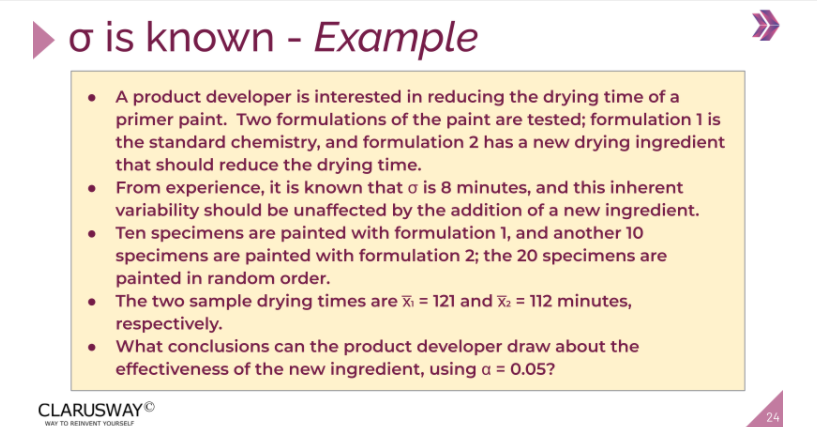

### Two Samples Z-Test Formula

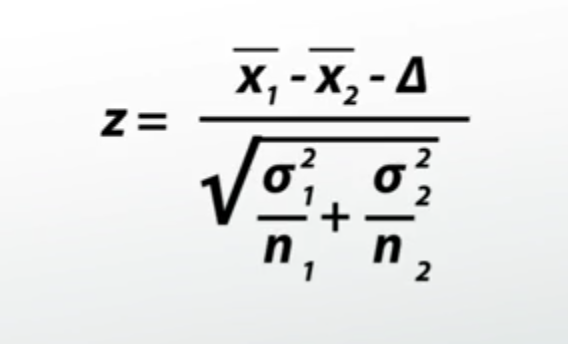

In [23]:
sigma = 8

x1 = 121
x2 = 112

n1 = n2 = 10

alpha = 0.05

In [ ]:
# Z-TEST ASSUMPTIONS
# The three basic assumptions of a test about difference between means are as follows:

- A quantitative response variable for two groups
- Independent random samples
- Population standard deviation is known or 30-observations sample

In [ ]:
# HYPOTHESIS

- H0: mu1 = mu2
- H1: mu1 > mu2

In [24]:
# TEST STATISTIC

z = (x1-x2) / (((sigma**2) / n1) + ((sigma**2) / n2)) ** 0.5
z

2.5155764746872635

In [25]:
1 - alpha 

0.95

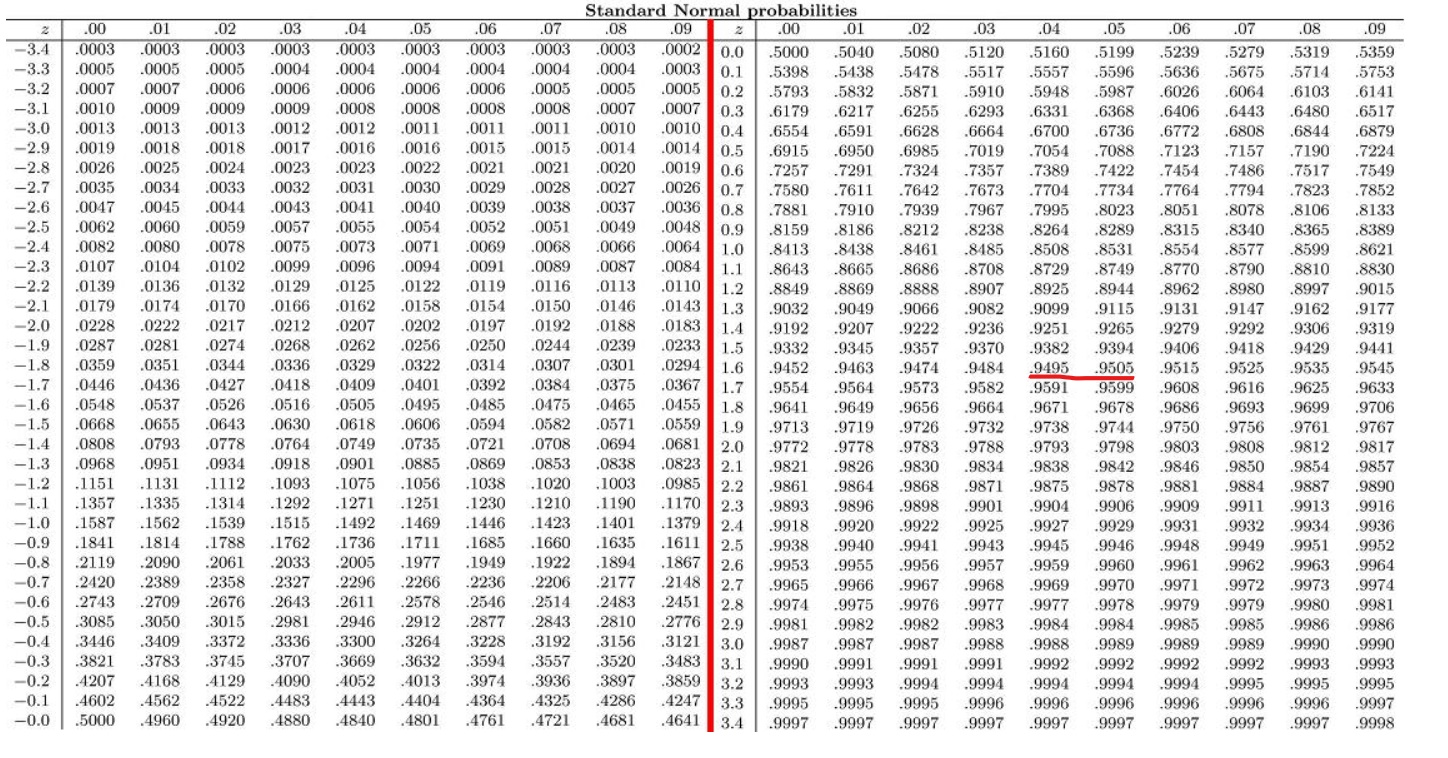

In [26]:
z > 1.645

True

In [ ]:
# Since z=2.52 is greater than 1.645, so we can reject the null hypothesis in favor of H1.

In [27]:
# P-VALUE

pValue = 1 - stats.norm.cdf(z)
pValue

0.00594189462107364

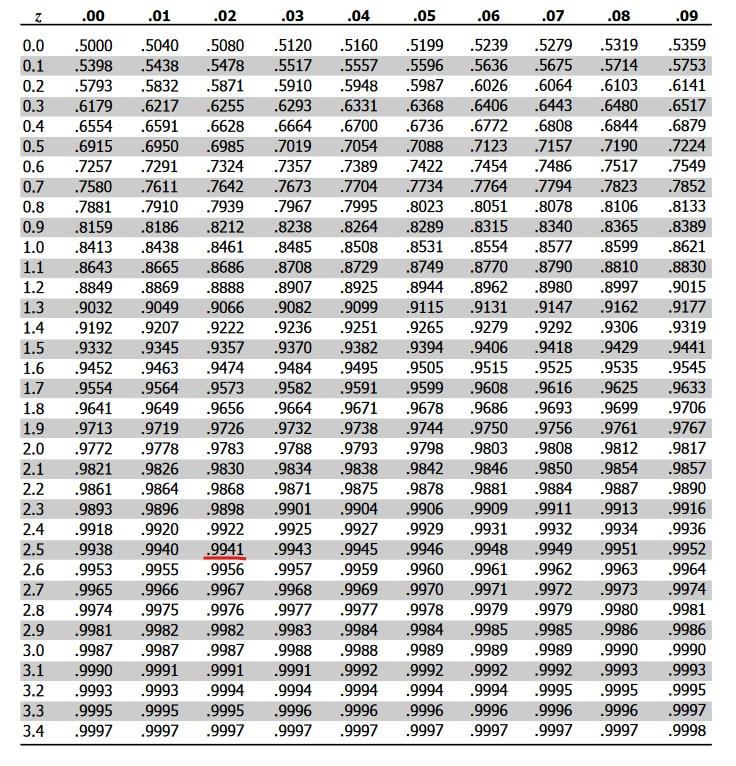

In [28]:
pValue_alternative = 1-0.9941
pValue_alternative

0.005900000000000016

In [ ]:
# P(z > 2.52 | H0 true) = .0059

In [29]:
# CONCLUSION (DECISION)

alpha = 0.05 # significance level

if pValue < alpha:
    print("Reject the Null")
else:
    print('Fail to Reject the Null')

Reject the Null


In [ ]:
# Adding the new ingredient reduces the drying time.

***

<div class="alert alert-block alert-danger">
    
<b>Independent Samples Z Test *(One-Tailed)*</b>
    
</div>

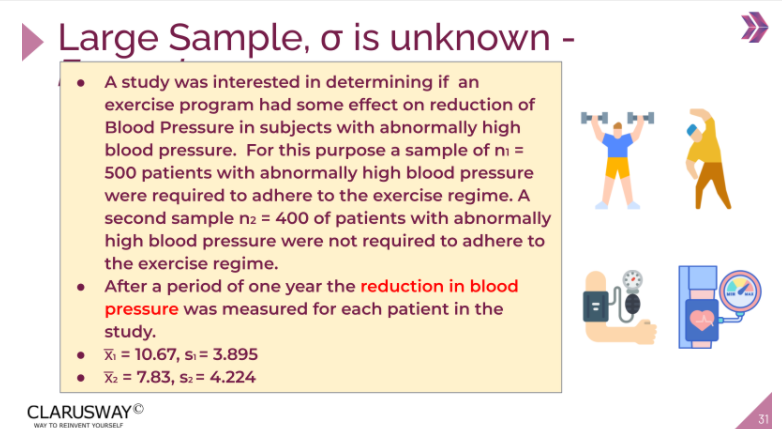

In [30]:
x1 = 10.67
x2 = 7.83

s1 = 3.895
s2 = 4.224

n1 = 500
n2 = 400

In [ ]:
# Z-TEST ASSUMPTIONS
# The three basic assumptions of a test about difference between means are as follows:

- Samples are selected random
- Independent random samples
- Population standard deviation is known or 30-observations sample

In [ ]:
# HYPOTHESIS

- H0: mu1 = mu2
- H1: mu1 > mu2

In [31]:
# TEST STATISTIC

z = (x1-x2) / (((s1**2) / n1) + ((s2**2) / n2)) ** 0.5
z

10.373845928958765

In [32]:
z > 1.645

True

In [ ]:
# Since z=10.37 is greater than 1.645, so we can reject the null hypothesis in favor of H1.

In [33]:
# P-VALUE

pValue = 1 - stats.norm.cdf(z)
pValue

0.0

In [ ]:
# pnorm(-10.37) = 1.697624e-25

In [ ]:
# P(z > 10.37 | H0 true) = .0000

In [34]:
# CONCLUSION (DECISION)

alpha = 0.05 # significance level

if pValue < alpha:
    print("Reject the Null")
else:
    print('Fail to Reject the Null')

Reject the Null


In [ ]:
# There is a significant effect due to the exercise regime on the reduction in blood pressure

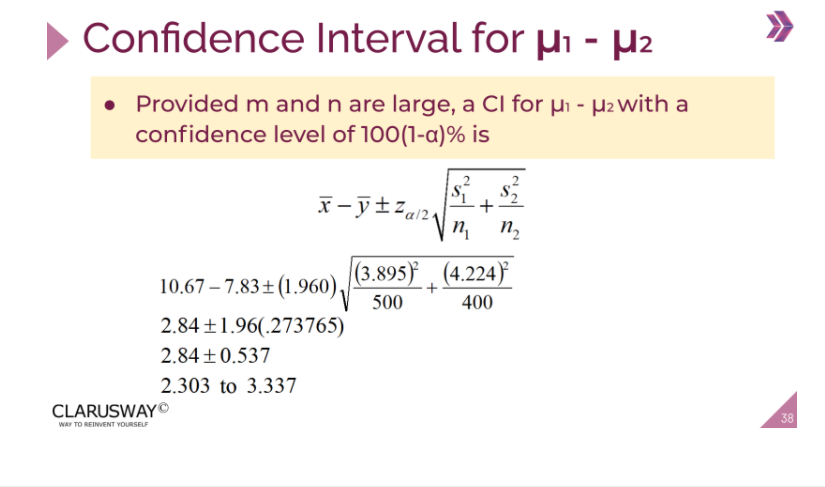

<div class="alert alert-block alert-danger">
    
<b>Independent Samples Z Test *(Two-Tailed)*</b>
    
</div>

Suppose the IQ levels among individuals in two different cities are known to be normally distributed with known standard deviations.

A researcher wants to know if the mean IQ level between individuals in city A and city B are different, so she selects a simple random sample of  20 individuals from each city and records their IQ levels.

In [35]:
from statsmodels.stats.weightstats import ztest as ztest

#enter IQ levels for 20 individuals from each city
cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
         105, 109, 109, 109, 110, 112, 112, 113, 114, 114]

cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
         109, 114, 115, 116, 117, 117, 128, 129, 130, 133]

#perform two sample z-test
result = ztest(cityA, cityB, value=0)
result

(-1.9953236073282115, 0.046007596761332065)

In [36]:
# CONCLUSION (DECISION)

alpha = 0.05 # significance level

if result[1] < alpha:
    print("Reject the Null")
else:
    print('Fail to Reject the Null')

Reject the Null


In [ ]:
# Since this p-value is less than .05, we have sufficient evidence to reject the null hypothesis. 
# In other words, the mean IQ level is significantly different between the two cities.